In [1]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Lectura de Datos Python
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# Calumnas 
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
#Explorando los datos
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#Tamaño de los datos
train.shape

(891, 12)

In [7]:
#Valores nulos
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# Distribución de las variables númericas
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
#Estudio de variables categóricas
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Penasco y Castellana, Mr. Victor de Satode",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [11]:
#Estudio de la variable Target

In [12]:
train.groupby(['Survived']).count()['PassengerId']

Survived
0    549
1    342
Name: PassengerId, dtype: int64

In [13]:
# Target vs sexo del pasajero
train.groupby(['Survived','Sex']).count()['PassengerId']

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64


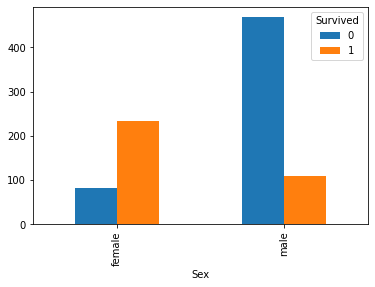

In [18]:
grouped_sex = train.groupby(['Survived','Sex']).count()['PassengerId']
print(grouped_sex)
grouped_sex.unstack(level=0).plot.bar()
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


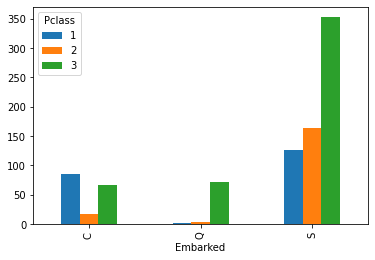

In [20]:
print(train.groupby(['Pclass','Embarked'])
     .count()['PassengerId']
     .unstack(level=0)
     .plot.bar())

In [21]:
#Procesamiento de datos

## Procesamiento de datos
*** Survived
*** Sex
*** Age
*** Pclass

In [22]:
train[['Survived','Sex','Age']].head(3)

,Survived,Sex,Age
0,0,male,22.0
1,1,female,38.0
2,1,female,26.0


In [24]:
# Buscamos los nulos
train[['Survived','Sex','Age','Pclass']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Pclass    891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


In [25]:
# mirar como se distribuyen los nulos en edad
(train[train['Age'].isna()]
      .groupby(['Sex', 'Pclass'])
      .count()['PassengerId']
      .unstack(level=0))

Sex,female,male
Pclass,,
1,9,21
2,2,9
3,42,94


In [26]:
(train[train['Age'].isna()]
      .groupby(['SibSp', 'Parch'])
      .count()['PassengerId']
      .unstack(level=0))

SibSp,0,1,2,3,8
Parch,,,,,
0,133.0,21.0,3.0,NaN,NaN
1,1.0,3.0,NaN,4.0,NaN
2,3.0,2.0,NaN,NaN,7.0


In [27]:
# Calcular la edad mediana para imputar a los datos faltantes
train['Age'].median()

28.0

In [28]:
# Imputar valro para rellenar nulos en la edad
train['Age'] = train['Age'].fillna(28.0)
train[['Survived','Sex','Age','Pclass']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   Pclass    891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


In [29]:
# Rellenados con la mediana de 28 los datos de edad nulos

## El problema de el 'object'
### Reemplamos los valores 'female' por 1 y 'male' por 0

In [30]:
#Usamos map para el reemplazo
train['Sex'] = train['Sex'].map({'female':1,'male':0}).astype(int)

In [31]:
train[['Survived','Sex','Age','Pclass']].head()

,Survived,Sex,Age,Pclass
0,0,0,22.0,3
1,1,1,38.0,1
2,1,1,26.0,3
3,1,1,35.0,1
4,0,0,35.0,3


In [33]:
# Nueva variante para el caso de las personas que viajan solas
train['FlagSolo'] = np.where(
(train['SibSp']==0) & (train['Parch']==0),1,0)

Survived  FlagSolo
0         0           175
          1           374
1         0           179
          1           163
Name: PassengerId, dtype: int64


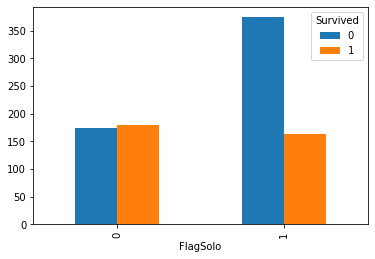

In [34]:
grouped_flag = train.groupby(['Survived','FlagSolo']).count()['PassengerId']
print(grouped_flag)
(grouped_flag.unstack(level=0).plot.bar())
plt.show()

In [35]:
train[['Survived','Sex','Age','Pclass','FlagSolo']].head()

,Survived,Sex,Age,Pclass,FlagSolo
0,0,0,22.0,3,0
1,1,1,38.0,1,0
2,1,1,26.0,3,1
3,1,1,35.0,1,0
4,0,0,35.0,3,1


In [38]:
# variable dependiente
Y_train = train['Survived']

# preprocesamiento de variables independientes
features = ['Sex', 'Age', 'Pclass', 'FlagSolo']
X_train = train[features]

print(Y_train.shape, X_train.shape)

(891,) (891, 4)


## Modelos

- regresión logistica
- árboles de decisión

In [39]:
# Entrenando modelos de regresión logística
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)

LogisticRegression()

In [40]:
#Entrenando árboles de decisión
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)

DecisionTreeClassifier()

## Evaluación
- Matriz de confusión para evaluar la certeza de cada modelo

In [41]:
from sklearn.metrics import plot_confusion_matrix

def conf_mat_acc(modelo):
  disp = plot_confusion_matrix(modelo, X_train, Y_train,
                        cmap=plt.cm.Blues, values_format="d")
  true_pred = disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]
  total_data = np.sum(disp.confusion_matrix)
  accuracy = true_pred/total_data
  print('accuracy: ', np.round(accuracy, 2))
  plt.show()

/home/daniel/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


accuracy:  0.79


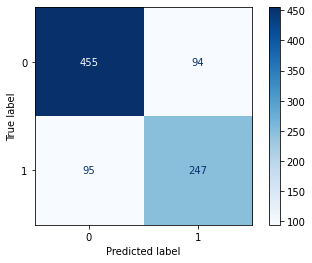

In [42]:
conf_mat_acc(logreg)

/home/daniel/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


accuracy:  0.89


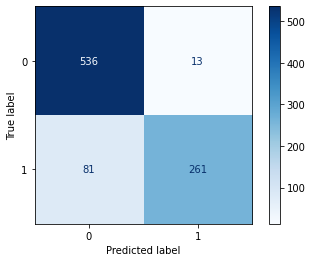

In [43]:
conf_mat_acc(decision_tree)

## Evaluación sobre el test set
- Finalizados los entrenamientos, se procede a corroboración con los datos de control


In [47]:
# Ahora se prepara el test set
print(test.head(3))
test.info()

   PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2          894       2         Myles, Mr. Thomas Francis    male  62.0      0   

   Parch  Ticket    Fare Cabin Embarked  
0      0  330911  7.8292   NaN        Q  
1      0  363272  7.0000   NaN        S  
2      0  240276  9.6875   NaN        Q  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 no

In [48]:
# preprocesando test set

# hacer map a Sex
test['Sex'] = test['Sex'].map({'female': 1, 'male': 0}).astype(int)

# rellenar Age
test['Age'] = test['Age'].fillna(28.0)

# Crear FlagSolo
test['FlagSolo'] = np.where(
    (test['SibSp'] == 0) & (test['Parch'] == 0), 1, 0)

In [49]:
# crear test set 
X_test = test[features]

print(X_test.shape)

(418, 4)


In [50]:
# prediccion de Survived en test set
Y_pred_log = logreg.predict(X_test)
Y_pred_tree = decision_tree.predict(X_test)
print(Y_pred_log[0:10])

[0 0 0 0 1 0 1 0 1 0]


## Predicción

In [51]:
# prediciendo sobre el test set
print(Y_pred_log[0:20])
print(Y_pred_tree[0:20])

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0]
[0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0]


In [52]:
# para descargar en ordenador
def download_output(y_pred, name):
  output = pd.DataFrame({'PassengerId': test.PassengerId, 
                         'Survived': y_pred})
  output.to_csv(name, index=False)

# Conclusion
* importante del análisis exploratorio 
* creación de variables
* probar varios modelos
* calculo del error con el test_set
* vimos (casi) todo el proceso de ciencia de datos en un ejemplo
